In [23]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("credit_risk_dataset.csv")

df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [2]:
df.shape

(32581, 12)

In [3]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [4]:
df = df.dropna()

In [5]:
df = df.drop_duplicates()

In [6]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [7]:
df['loan_status'].value_counts()

loan_status
0    22313
1     6188
Name: count, dtype: int64

In [8]:
df['loan_status'] = df['loan_status'].map({
    'Fully Paid': 0,
    'Charged Off': 1
})

In [9]:
df.isnull().sum()

person_age                        0
person_income                     0
person_home_ownership             0
person_emp_length                 0
loan_intent                       0
loan_grade                        0
loan_amnt                         0
loan_int_rate                     0
loan_status                   28501
loan_percent_income               0
cb_person_default_on_file         0
cb_person_cred_hist_length        0
dtype: int64

In [10]:
df['loan_status'].value_counts()

Series([], Name: count, dtype: int64)

In [11]:
df['loan_status'].value_counts(normalize=True) * 100

Series([], Name: proportion, dtype: float64)

In [14]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

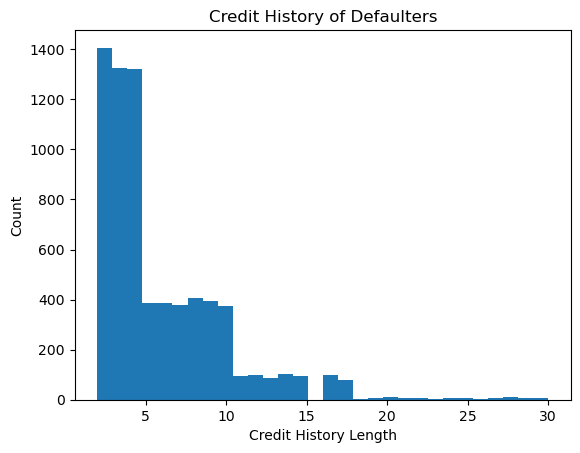

In [24]:
import matplotlib.pyplot as plt

plt.hist(df[df['loan_status']==1]['cb_person_cred_hist_length'], bins=30)
plt.title("Credit History of Defaulters")
plt.xlabel("Credit History Length")
plt.ylabel("Count")
plt.show()

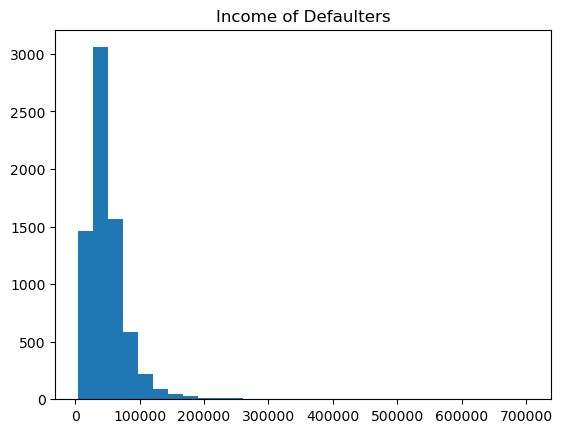

In [25]:
plt.hist(df[df['loan_status']==1]['person_income'], bins=30)
plt.title("Income of Defaulters")
plt.show()

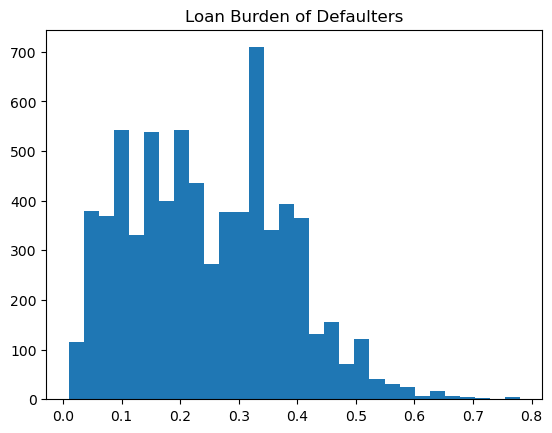

In [26]:
plt.hist(df[df['loan_status']==1]['loan_percent_income'], bins=30)
plt.title("Loan Burden of Defaulters")
plt.show()

In [19]:
df['loan_status'].value_counts()

Series([], Name: count, dtype: int64)

In [20]:
df[df['loan_status']==1]['loan_percent_income'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: loan_percent_income, dtype: float64

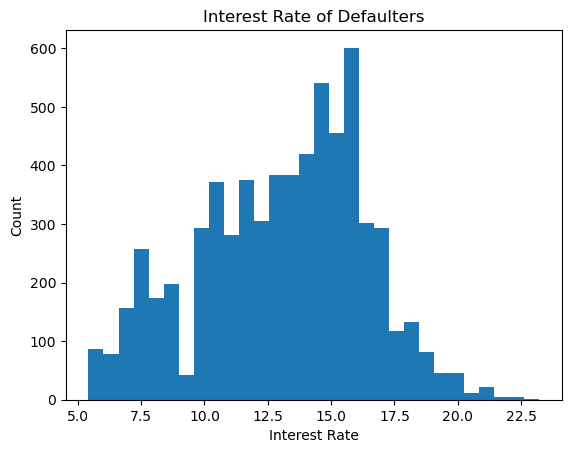

In [27]:
plt.hist(df[df['loan_status']==1]['loan_int_rate'], bins=30)
plt.title("Interest Rate of Defaulters")
plt.xlabel("Interest Rate")
plt.ylabel("Count")
plt.show()

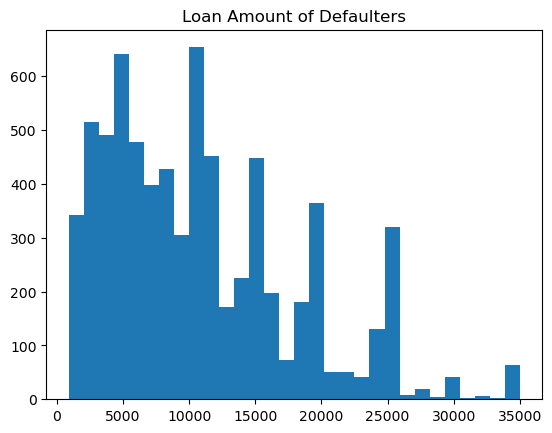

In [28]:
plt.hist(df[df['loan_status']==1]['loan_amnt'], bins=30)
plt.title("Loan Amount of Defaulters")
plt.show()

In [29]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [30]:
X = pd.get_dummies(X, drop_first=True)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [33]:
import numpy as np

X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()
y = y.loc[X.index]

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [36]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [37]:
y_pred = model.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8631284916201117

In [41]:
import os
os.getcwd()

'C:\\Users\\Admin\\Downloads\\Loan_Default_Project'

In [42]:
joblib.dump(model, "loan_default_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']